# Chatbot with Python and Open Source LLMs

## Installing required libraries

In [1]:
!pip install huggingface
!pip install transformers
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [2]:
# Importing necessary libraries
from transformers import AutoTokenizer
import gradio as gr
from transformers import pipeline

model = 'deepset/roberta-base-squad2' # The model used is deepset/roberta-base-squad2
tokenizer = AutoTokenizer.from_pretrained(model) # To enable the same tokenization on which the model was trained on

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [3]:
# Creating a "question-answering" Hugging Face pipeline
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)

# Sample test cases
context = '''My name is Prathyusha and I love working on the LLMs and Generative AI
and I live in Bangalore
'''
question = "what is my name?"
result = nlp(question = question, context=context)
result

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

{'score': 0.8201781511306763, 'start': 11, 'end': 21, 'answer': 'Prathyusha'}

In [4]:
question = "what do I love?"
result = nlp(question = question, context=context)
result

{'score': 0.5208179354667664,
 'start': 33,
 'end': 70,
 'answer': 'working on the LLMs and Generative AI'}

## Chatbot UI 1

In [5]:
# Creating the function tp wrap in Gradio UI
def get_answer(context, question):
  """
  Parameters:
  context: String containing the context given by user
  question: String containing the question asked by user

  Returns: String of the answer to the parameter "question"
  """
  result = nlp(question = question, context=context)
  return result['answer']

# Creating the Gradio Chatbot Interface
app = gr.Interface(
    fn=get_answer,
    inputs = ['textbox', 'text'],
    outputs = 'textbox',
    title = "Prathyusha's Bot 🤖😊",
    theme = gr.themes.Soft(),
    description = 'Provide your context and ask the Chatbot a question to get an answer!')

# launching the Chatbot app
app.launch(inline=False,share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7c4f2590cf6a9b5478.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Output Screenshot

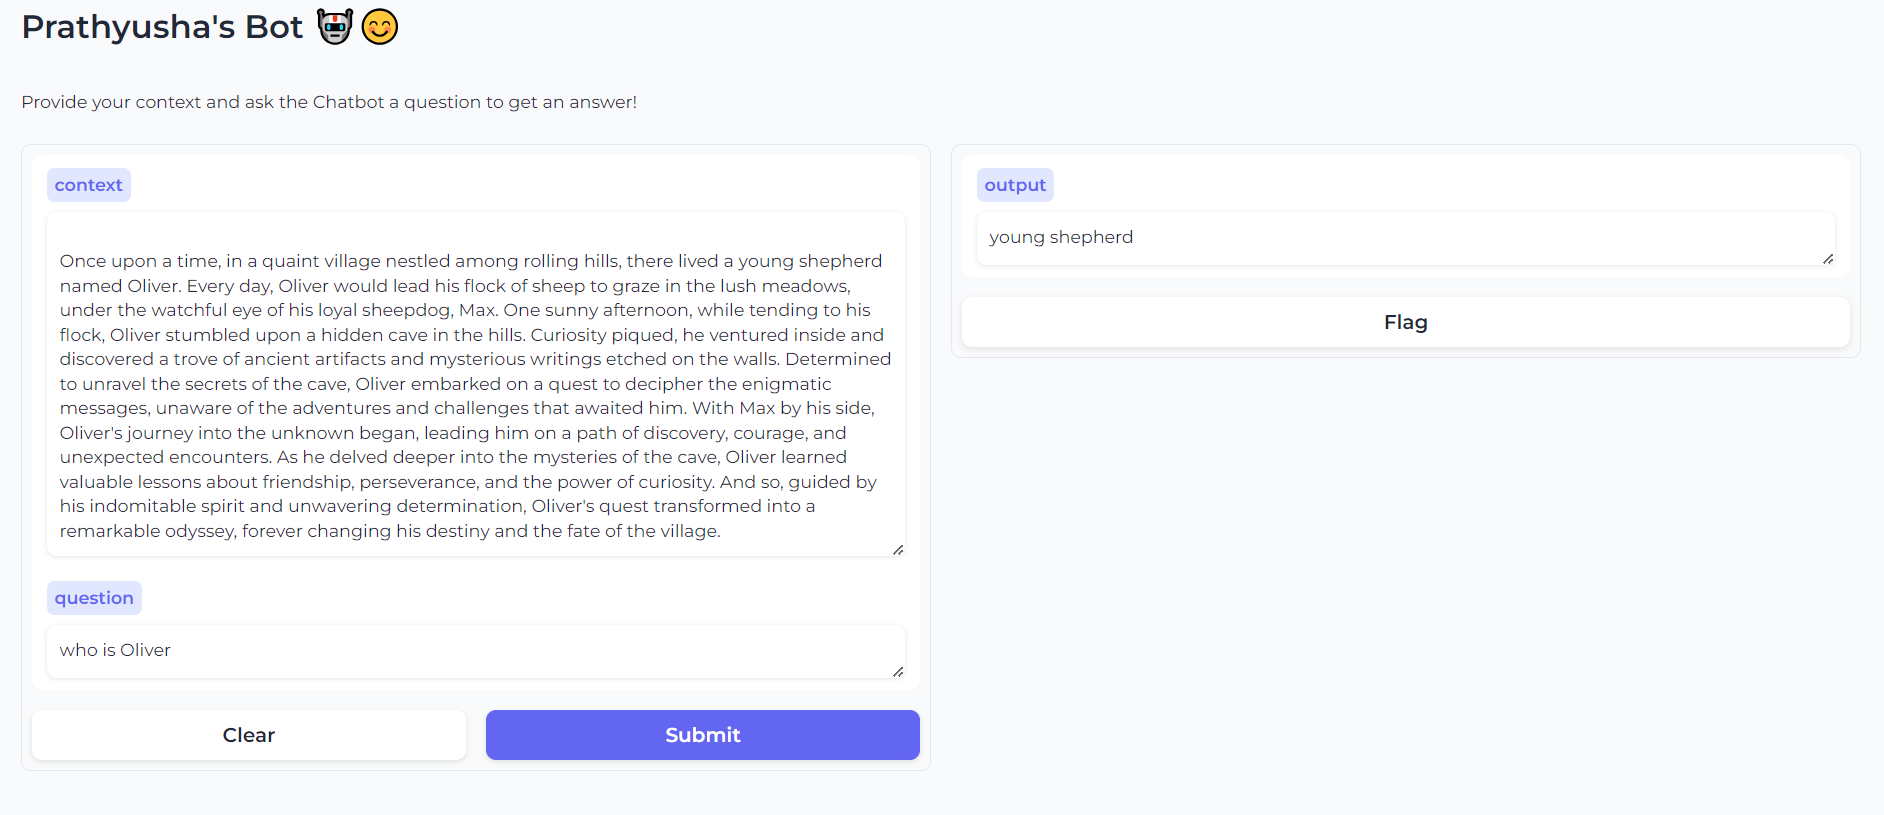

* I have generated a Gradio UI with Soft theme for my chatbot.
* I have included two input boxes, one each for context and question.

## Chatbot UI 2

In [ ]:
with gr.Blocks() as app:
    context = gr.Textbox(label="Context")
    question = gr.Textbox(label="Question")
    output = gr.Textbox(label="Answer")
    greet_btn = gr.Button("Answer my question")
    greet_btn.click(fn=get_answer, inputs=[context, question], outputs=output, api_name="answer")

# launching the Chatbot app
app.launch(inline=False,share = True)

{'targets': [(312, 'click')],
 'inputs': [309, 310],
 'outputs': [311],
 'backend_fn': True,
 'js': None,
 'queue': None,
 'api_name': 'answer',
 'scroll_to_output': False,
 'show_progress': 'full',
 'every': None,
 'batch': False,
 'max_batch_size': 4,
 'cancels': [],
 'types': {'continuous': False, 'generator': False},
 'collects_event_data': False,
 'trigger_after': None,
 'trigger_only_on_success': False}

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4f92cbb81688f60f35.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### Output Screenshot

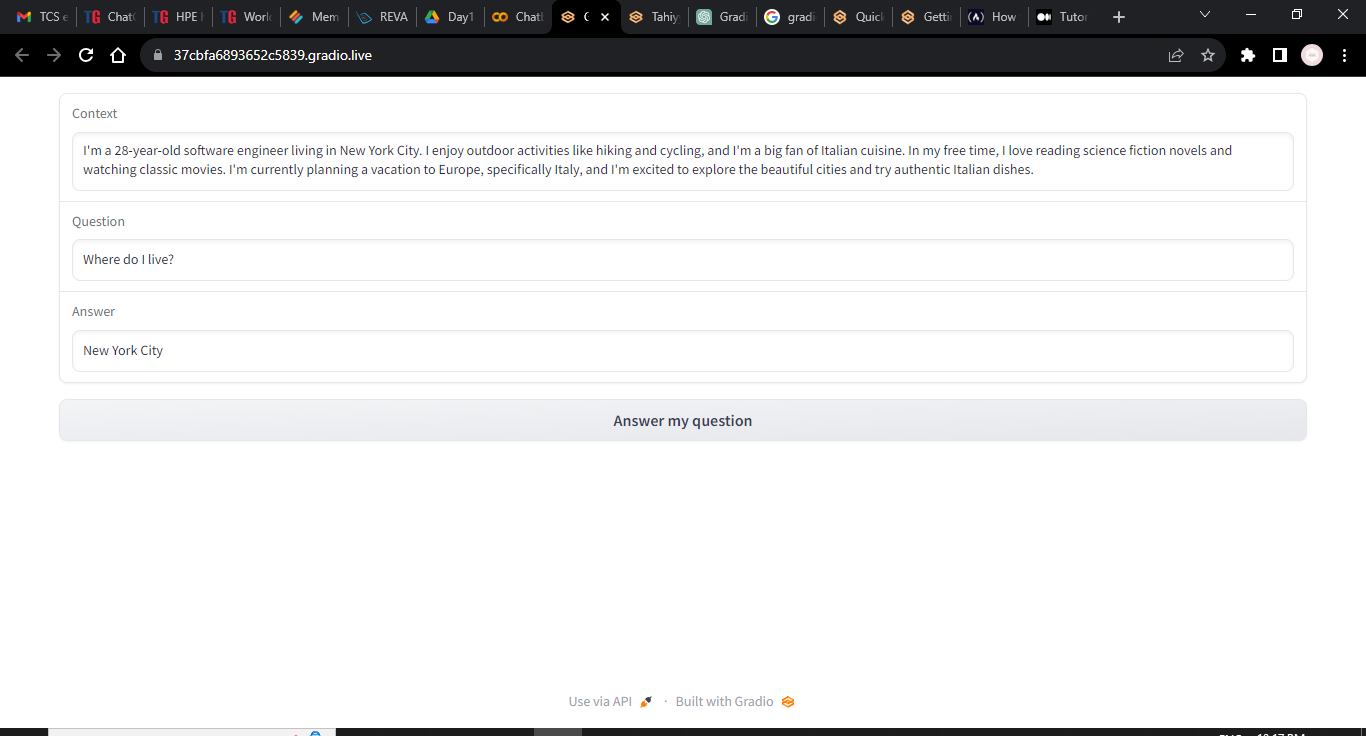

* I have generated a Gradio UI with the concept of Blocks for my next chatbot.
* I have included two input boxes, one each for context and question and an output box.

In [ ]:
%%shell
jupyter nbconvert --to html Assignment2_Chatbot_with_LLM.ipynb

[NbConvertApp] Converting notebook Assignment2_Chatbot_with_LLM.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 285, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconv

CalledProcessError: ignored